# Curso de Big Data. Otoño 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo 24 de marzo a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: v.oubina@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [1]:
import requests

In [2]:
buscar = "camisetas de velez"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

response = requests.request("GET", url)
response.text

data = response.json()
data

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'camisetas de velez',
 'paging': {'total': 259, 'primary_results': 66, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1370159138',
   'title': 'Camiseta Diadora Velez 2023 Home ',
   'condition': 'new',
   'thumbnail_id': '864817-MLA54553671410_032023',
   'catalog_product_id': None,
   'listing_type_id': 'gold_pro',
   'permalink': 'https://articulo.mercadolibre.com.ar/MLA-1370159138-camiseta-diadora-velez-2023-home-_JM',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA1286',
   'domain_id': 'MLA-FOOTBALL_SHIRTS',
   'variation_id': '177032011586',
   'thumbnail': 'http://http2.mlstatic.com/D_864817-MLA54553671410_032023-O.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 39099.15,
   'original_price': 45999,
   'sale_price': None,
   'available_quantity': 1,
   'official_store_id': 2117,
   'official_store_name': 'Diadora',
   'use_thumbnail_id': False,
   'accepts_m

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [3]:
import pandas as pd

In [4]:
precios = [item['price'] for item in data['results']]

df = pd.DataFrame(precios, columns=['Precio'])
print(df)

#promedios, mínimos y máximos
precio_promedio = df['Precio'].mean()
precio_minimo = df['Precio'].min()
precio_maximo = df['Precio'].max()

print("precio promedio:", precio_promedio)
print("precio mín:", precio_minimo)
print("precio máx:", precio_maximo)

       Precio
0    39099.15
1    39999.00
2    53531.55
3    47599.15
4    53531.55
5    37599.00
6    37599.00
7    37324.89
8    64999.00
9    45999.00
10   52988.51
11   48999.00
12   53531.55
13   39999.00
14   59421.30
15   45395.63
16   21840.50
17   42663.78
18   49404.05
19   30999.00
20   30999.00
21   49999.00
22   28000.00
23   64999.00
24   32000.00
25   64997.10
26   11999.00
27   29999.00
28   42500.00
29   34500.00
30   45990.00
31   54999.00
32   45999.00
33    8500.00
34   45599.05
35   25000.00
36   49999.00
37   62999.00
38   32299.15
39    8999.00
40   45999.00
41   45999.00
42  490000.00
43   47999.20
44   45999.99
45   41999.30
46   54999.00
47   34500.00
48   44999.00
49   45000.00
precio promedio: 51407.867999999995
precio mín: 8500.0
precio máx: 490000.0


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

In [5]:
import matplotlib.pyplot as plt

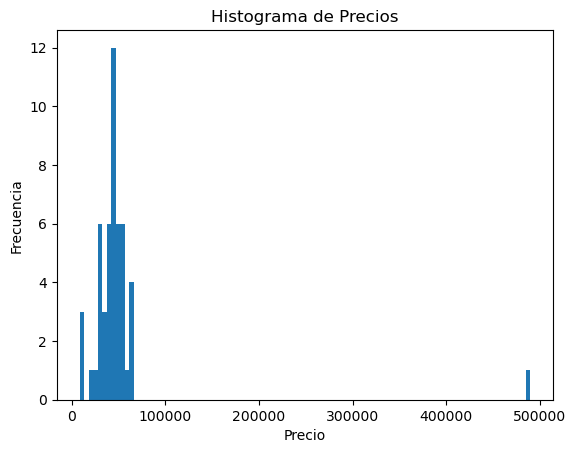

In [6]:
plt.hist(precios, bins=100)

plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

plt.show()
#Se puede ver un outlier con precio de $490.000 que coincide con el precio máximo

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [7]:
categoria = "MLA5725"
url2 = "https://api.mercadolibre.com/sites/{}/search?category={}".format("MLA", categoria)
response2 = requests.request("GET", url2)
response2.text

data2 = response2.json()
data2

precios2 = [item['price'] for item in data2['results']]
df2 = pd.DataFrame(precios2, columns=['Precio'])
print(df2)


       Precio
0     3830.40
1   197554.00
2    39999.00
3    26679.08
4    37332.00
5    27499.00
6    92958.40
7    65899.00
8     5780.39
9    30900.00
10   36000.00
11    9500.00
12  104389.00
13   15990.00
14    6248.70
15   27000.00
16  218622.00
17  118000.00
18   24318.00
19   38763.95
20  112692.00
21   51900.00
22   60445.10
23   22999.00
24   28813.00
25  120200.00
26  276852.00
27   11399.00
28   66143.68
29   37499.00
30  298174.00
31   19007.00
32    5499.45
33   87999.00
34   18383.00
35  288274.00
36    4139.08
37   16499.00
38   71999.00
39   21599.00
40  150858.00
41    8001.60
42   50960.00
43   98753.60
44    4999.99
45  125999.00
46  128658.00


In [8]:
import numpy as np

In [9]:
precio_promedio2 = df['Precio'].mean()

print("precio promedio:", precio_promedio2)
sd = np.std(precios2)

print("desvio estandar:", sd)
#Podemos ver que el precio promedio de los productos de la categoria es $51547. Sin embargo, como esta categoria es muy homogenea, hay un desvio estandar muy alto (65475). Esto muestra que la categoria tiene una variedad de precios alta.

precio promedio: 51407.867999999995
desvio estandar: 76087.94898434142


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [10]:
from bs4 import BeautifulSoup

In [11]:
website = 'https://www.lanacion.com.ar/'
r = requests.get(website)
content = r.content
soup = BeautifulSoup(content, 'html.parser')

# Obtenemos el código
paginaprincipal = soup.find('main', class_='main-container')  #Traemos los contenidos de main (donde estan todas las noticias)
a_tags = paginaprincipal.find_all('a') if paginaprincipal else []

link_values = [link.get('href') for link in a_tags] #Obtenemos el contenido de los hrefs.

# Preparamos la lista filtrada
filtered_values = []

# Filtro y ajuste de los links
for value in link_values:
    if value and "-" in value:  # Chequeamos value no es None. #Agarramos solo las noticias que contienen un -. Notamos que son noticias si tienen -, si no lo tienen puede agarrar secciones
        # Comprobamos si el link ya es absoluto o si necesitamos hacerlo absoluto
        filtered_values.append(f'https://www.lanacion.com.ar{value}')

# Creamos del DataFrame
df_links = pd.DataFrame(filtered_values, columns=['Links'])

# Guardamos en Excel
excel_filename = 'noticias_lanacion.xlsx' 
df_links.to_excel(excel_filename, index=False)

print(f'Generamos el excel: {excel_filename}')

Generamos el excel: noticias_lanacion.xlsx
